In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
pd.options.display.float_format = '{:.2f}'.format

### Inferences about proportions: the binomial distribution

The binomial distribution is used to describe proportions: proportions of failures in inspection control, proportion of success in throwing dices or coins

The main parameters are:
- n: number of trials
- p: probability of success of a trial
- q = 1 - p: probability of failure of a trial

The distribution is characterized by:
- $\eta$ = np
- $\sigma^2$ = npq

The probability that there are y successes in n trials is: P(y) = ${n \choose y}p^{y}q^{n-y}$ 

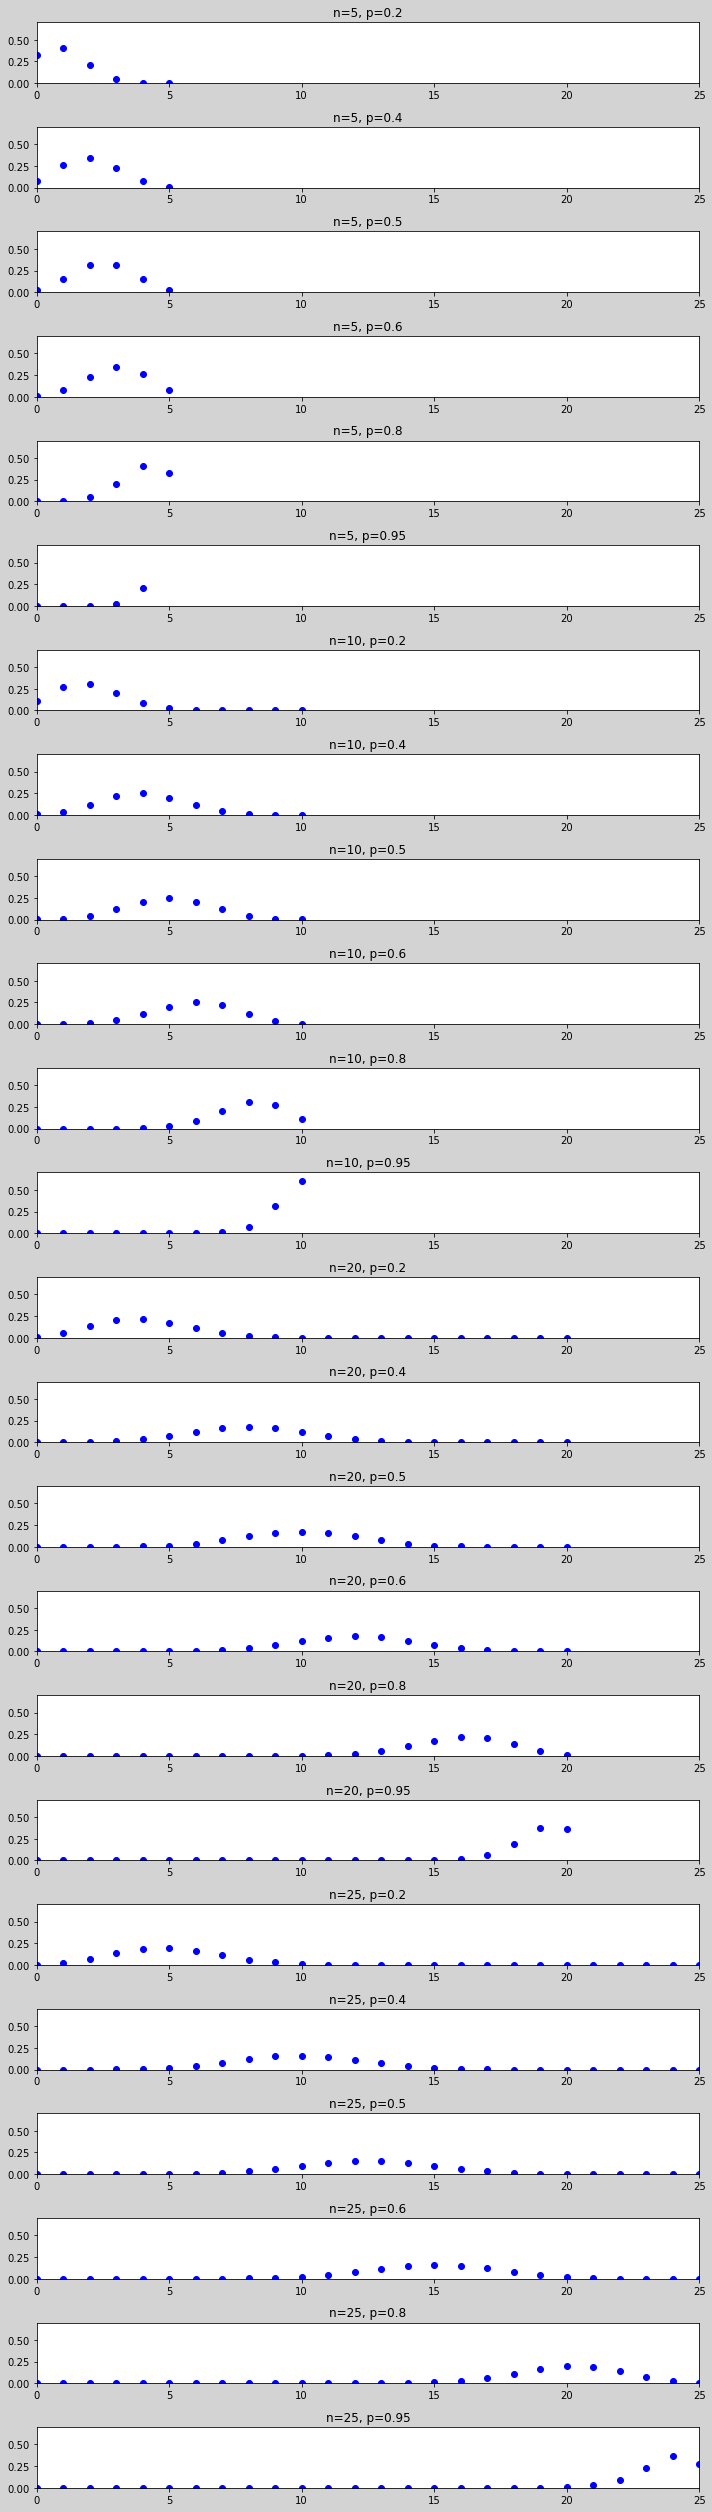

In [2]:
# example of binomial distribution with various parameters
n_range = [5, 10, 20, 25]
p_range = [0.2, 0.4, 0.5, 0.6, 0.8, 0.95]
fig, ax = plt.subplots(len(n_range) * len(p_range), figsize=(10, 35))
fig.set(facecolor='lightgray')
counter = 0
for n in n_range:
    for p in p_range: 
        x = np.arange(n+1)
        ax[counter].axis([0,n_range[-1],0, 0.7])
        ax[counter].plot(x, st.binom.pmf(x, n, p),'bo')
        ax[counter].set_title(f'n={n}, p={p}')
        counter+=1
fig.tight_layout()


We can see on the chart that for lower or higher value of p, the distribution is very skewed. It only looks normal when p is in the middle range, around 0.5

When we can do the normal approximation, it can be shown that P(y > $y_0$) is best approximated by P(z > $z_0$) where z is a unit normal variable and $z_0 = (y_0 - 1/2 - np)/\sqrt{npq}$

We can also compute the distribution of y/n $\hat{p}$ which has mean $\eta_{\hat{p}} = p$ and standard deviation $\sigma_{\hat{p}} = \sqrt{pq/n}$

#### Test of significance
Assume that we want to test if 20 coin tosses resulting in 15 heads give us suspicions about the fairness of the coin

In [3]:
# null hypothesis: p = 0.5 vs. p > 0.5
p_goet15 = 1 - st.binom.cdf(14,20,0.5)
print(f'probability that we get value greater or equal to 15 is {p_goet15:.03f}') 

probability that we get value greater or equal to 15 is 0.021


We can dismiss the null hypothesis as value is less than 0.05 and say that the coin is not fair (p > 0.5)

#### _Exercise 1_
IQ test is standardized so that 50% of male adults in the general population obtain scores over 100. Among 43 males applicants tested at local army office, only 10 obtained scores higher than 100. Is there evidence that the sample is not representative of the population?

In [4]:
# success if having score > 100. Null hypothesis is p = 50% vs. p < 50%
p_lt10 = st.binom.cdf(10,43,0.5)
print(f'probability that we get value less than or equal to 10 is {p_lt10:.05f}') 

probability that we get value less than or equal to 10 is 0.00030


Since 0.003 < 0.05, we have reasons to believe the sample is not representative

#### _Exercise 2_
Police randomly selected 100 cars and found 37 people not wearing seatbelts. What is the confidence interval?

In [5]:
# assume we can use the normal assumption because p is not at the extreme levels
n = 100
k = 37
p = k/n
q = 1 - p
y1 = n*p + 1.96*math.sqrt(n*p*q)
y2 = n*p - 1.96*math.sqrt(n*p*q)
print(f'the confidence internval is {y1/n:0.03f} and {y2/n:0.03f}')

the confidence internval is 0.465 and 0.275


#### _Exercise 3_
- In a plant that makes ball bearings, bearings are routinely subjected to crushing test
- Sampling inspection scheme: if out of a random sampling of n bearings, more than y fail, the batch is rejected. Otherwise, it is accepted.
- Denote by p the proportion of bearings in a large batch that will fail the test
- It is required: 95% chance of accepting a batch for which p is as low as 0.3 and a 95% chance of rejecting a batch for which p is as high as 0.5
- Find the value of n and y that will be satisfactory

Solution:

We use the fact that p(y > $y_0$) can be approximated by normal expression p (z > $z_{0}$) where $z_{0} = (y_{0} - 0.5 - np)/\sqrt{npq}$

In one case we have $z_{\alpha = 0.05}$ = ($y_{0} - 0.5 - n*0.3)/\sqrt{n*0.3*0.7}$

In the other case we have $z_{\alpha = 0.95}$ = ($y_{0} - 0.5 - n*0.5)/\sqrt{n*0.5*0.5}$

In [6]:
z_5pct = st.norm.ppf(0.95)
z_95pct = st.norm.ppf(0.05)
print(f'z_5pct and z_95pct are respectively {z_5pct:0.03f} and {z_95pct:0.03f}')
n = (z_5pct*(math.sqrt(0.21) + math.sqrt(0.25))/0.2)**2
y_0 = (z_5pct*math.sqrt(n*0.3*0.7)) + 0.5 + n*0.3
print(f'n and y_0 are {round(n)} and {round(y_0)}')

z_5pct and z_95pct are respectively 1.645 and -1.645
n and y_0 are 62 and 25


#### Variance stabilizing transformation for the binomial distribution

Example is for testing mothproofing agents: place 20 moth larvae in contact with a treated wool sample and noting the number that die

In [7]:
data = {
    'A':[8,7,1,16,10,19,9],
    'B':[12,6,3,19,15,20,11]
}
df = pd.DataFrame(data)
df.name = 'number of dead moth larvae for agent A and B'
df.index = df.index.rename('lab')+1
df['AProp']=df['A']/20
df['BProp']=df['B']/20
df.style.format({'AProp':'{:.02%}', 'BProp':'{:.02%}'})
# this is the conversion with variance stabilizing transformation
df['AScore'] = df['AProp'].apply(lambda x:np.arcsin(math.sqrt(x))*200/math.pi)
df['BScore'] = df['BProp'].apply(lambda x:np.arcsin(math.sqrt(x))*200/math.pi)
df.style.format({'AScore':'{:.02f}', 'BScore':'{:.02f}'})
print(df.name)
df

number of dead moth larvae for agent A and B


,A,B,AProp,BProp,AScore,BScore
lab,,,,,,
1,8,12,0.40,0.60,43.59,56.41
2,7,6,0.35,0.30,40.30,36.90
3,1,3,0.05,0.15,14.36,25.32
4,16,19,0.80,0.95,70.48,85.64
5,10,15,0.50,0.75,50.00,66.67
6,19,20,0.95,1.00,85.64,100.00
7,9,11,0.45,0.55,46.81,53.19


Now we are ready to do a t test on the proportions:
- null hypothesis is that there is no difference between treatments
- alternative hypothesis is that B is better than A
- assume proportion for each lab is normally distributed, and that they have more or less same variance (which is not true because the variance depends on the mean proportion)
- we compute new variable d = difference between proportions for method A and B across labs
- assume d is normally distributed, same variance across lab, labs have been randomized
- t statistic which is the average of d has t distribution

In [8]:
yAvg = (1/7)*(df['BProp'] - df['AProp']).sum() 
ySDe = math.sqrt((1/6)*(((df['BProp'] - df['AProp']).apply(lambda x: (x - yAvg)**2)).sum()))
t = yAvg/(ySDe/math.sqrt(7))
pVal = 1 - st.t.cdf(t,6)
print(f't value is {t:.02f} and p value is {pVal:.03f}')

t value is 3.06 and p value is 0.011


The t value is 3.06 and p value is 1.1% on one side, 2.2% on both sides. This is significant so we can reject the null hypothesis.

Now we will do the same tests using instead the score of lab A and B which is produced using a variance stabilizing transformation.

In [9]:
yAvg = (1/7)*(df['BScore'] - df['AScore']).sum() 
ySDe = math.sqrt((1/6)*(((df['BScore'] - df['AScore']).apply(lambda x: (x - yAvg)**2)).sum()))
t = yAvg/(ySDe/math.sqrt(7))
pVal = 1 - st.t.cdf(t,6)
print(f't value is {t:.02f} and p value is {pVal:.03f}')

t value is 3.96 and p value is 0.004


We can see that the p value is much smaller thus the test is much more sensitive with the variance stabilization method.

#### What happens when the probabilities vary

_Base case_  
Let's recall first the base case: if we throw 20 pennies for each of which p = 0.8, the distribution of the number of heads y is the binomial distribution, with mean $\mu = np$ = 20 * 0.8 = 16 and variance $\sigma^2 = npq$ = 20 * 0.8 * 0.2 = 3.2.

_Probability vary within each trial_  
Now, imagine n = 20 pennies with different probabilities of success (2 at 0.6, 4 at 0.7, 6 at 0.8, 8 at 0.9). What is the mean and standard deviation of y, defined as the number of successes of the 20 pennies?

First, let's analyze the distribution of probabilities:
- define $\bar{p} = \frac{\sum(p_i)}{n}$ = (1/20) 

In [10]:
p = np.array([0.6,0.6,0.7,0.7,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.8,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9])
n = len(p)
p_bar = (1/n) * p.sum()
p_var = (1/n) * ((p-p_bar)**2).sum()
print(f'the distribution of p has mean p_bar = {p_bar} and variance p_var = {p_var:0.02f}')
print(f'we can check it matches the computation done with numpy functions {p.mean()} and {p.var():0.02f}')

the distribution of p has mean p_bar = 0.8 and variance p_var = 0.01
we can check it matches the computation done with numpy functions 0.8 and 0.01


If we write $Y = \sum{X_i}$ where each $X_i$ represents a penny, then, because the $X_i$ are independent of each other, we can compute:
- $\eta_y = E(Y) = \sum{E(X_i)} = \sum{p_i} = n\bar{p}$ = 20 * 0.8 = 16
- $\sigma_y^2 = \sum{var(X_i)} = \sum{p_iq_i} = \sum{p_i(1-p_i)} = \sum{p_i} - \sum{p_i^2}$

using the fact that $\sigma_p^2 = (1/n)\sum(p_i - \bar{p})^2 = (1/n)\sum{(p_i^2 - 2p_i\bar{p} + \bar{p}^2)} = (1/n)(\sum{p_i^2} -2n\bar{p}^2 + n\bar{p}^2) = (1/n)(\sum{p_i^2} - n\bar{p}^2)$, we can write that $\sum{p_i^2} = n\sigma_p^2 + n\bar{p}^2$

thus  $\sigma_y^2 = n\bar{p} - n\sigma_p^2 - n\bar{p}^2 = n\bar{p}(1-\bar{p}) - n\sigma_p^2$
in conclusion $\sigma_y^2 = n\bar{p}\bar{q} - n\sigma_p^2$

$\sigma_y^2$ = 20 * 0.8 * 0.2 - 20 * 0.01 = 3.2 - 0.2 = 3

NFD: what is the intuition behind this lower variance? Maybe the extreme values of some events, for example success from the p=0.6 penny or failure from the p=0.9 penny, end up washing off and in the middle when aggregated among the 20 pennies in the end, thus reducing the overall variance. Such extreme events, with penny identically distributed, would increase the variance.


_Probability vary between trials_  
If instead we take a penny at random from our pocket which contains the 20 variously biased coins and conduct a trial by tossing that particular penny 20 times and recording the number of heads y, returning the penny to the pocket and repeating the entire operation with another penny drawn randomly from the pocket, what is the distribution of y?

The law of total variance  
Fundamental result of probability theory in which the variance of a random variable Y can be expressed in terms of its conditional variance and conditional mean given another random variable X. More precisely, the total variance can be decomposed into two parts: the expected value of the conditional variance (variance within groups) and the variance of the conditional expectation (variance between group means). Formally, if X and Y are random variable in the same probability space, and Y has a finite variance, then:
$$Var(Y) = E[Var(Y|X)] + Var(E[Y|X])$$

- E[Var(Y|X)] measures the "unexplained" or within-group part. It is defined as $\sum{Var(Y|X=x_i) * P(X=x_i)}$. Therefore, it is probability weighted.
- Var(E[Y|X]) measures the "explained" or between-group part. Because E[Y|X] is a random variable that depends on X, it is defined as $Var[E(Y|X)] = E[(E(Y|X) - E[E(Y|X)]^2)]$

Example
5 students take exam with score 0-100. Y = student score, X = international or domestic student
| student | Y (score) | X |
| ------- | --------- | - |
|1|20|international|
|2|30|international|
|3|100|international|
|4|40|domestic|
|5|60|domestic|

- E[(Y|international)] = 50, Var(Y|international) = 1266.7
- E[(Y|domestic)] = 50, Var(Y|international) = 100  
Both groups have same mean so Var(E[Y|X]) = 0. The total variance is equal to the mean of the within-group variances (weighted by group size), i.e. 1266.7 x 3/5 + 100 x 2/5 = 800.



If we apply the law of total variance to Y, the number of heads, in the case where the probability varies between trials, we have: 
$Var(Y) = E[Var(Y|X)] + Var(E[Y|X])$ where: 
- $E[Var(Y|X)] = \sum{Var(Y|P=p_i) * P(P=p_i)} = \sum{np_iq_i * 1/n} = n\bar{p}\bar{q} - n\sigma_p^2$ based on the above
- $Var(E[Y|X]) = E[np_i - n\bar{p}]^2 = n^2E[p_i - \bar{p}]^2 = n^2\sigma_p^2$

$Var(Y) = E[Var(Y|X)] + Var(E[Y|X]) =  n\bar{p}\bar{q} - n\sigma_p^2 + n^2\sigma_p^2 = n\bar{p}\bar{q} + n(n-1)\sigma_p^2$ 

Another way to show the proof is using P as random variable:  
$Var(Y) = E[Var(Y|X)] + Var(E[Y|X]) = E[nP(1-P)] + Var(nP) = nE[P - P^2] + n^2Var(P)$  
Using Var(P) = E(P^2) - E^2(P), we have   
$Var(Y) = nE[P - P^2] + n^2Var(P) = nE(P) - nE(P^2) + n^2Var(P) = nE(P) - nVar(P) - nE^2(P) + n^2Var(P)= nE(P)(1-E(P)) + n(n-1)Var(P) = n\bar{p}\bar{q} + n(n-1)\sigma_p^2$


In this case, this means $\sigma_y^2$ = 20 x 0.8 x 0.2 + 20 x 19 x 0.01 = 3.2 + 3.8 = 7 




What is the conclusion? In general, denoting the variance within a trial by $\sigma_{1p}^2$ and the variance between trials by $\sigma_{2p}^2$, we have:   $$\sigma_{y}^2 = n\bar{p}\bar{q} - n\sigma_{1p}^2 + n(n - 1)\sigma_{2p}^2$$

Equivalently, the variance of $\hat{p} = y/n$ is:  
$$\sigma_{\hat{p}}^2 = \frac{1}{n}[\bar{p}\bar{q} - \sigma_{1p}^2 + (n - 1)\sigma_{2p}^2]$$

Variation within a trial produces a minor reduction of variance while variation between trials can lead to much larger increase in variance. 

_Application: sampling inspection of ball bearings_  
Each day 20 ball bearings are randomly sampled from routine production and are subjected to a crushing test. The number of ball bearings failing the test on 10 successive days are as follows:

In [26]:
n = 20
y = np.array([8,4,10,6,2,3,7,12,5,7])
y_bar = y.mean()
p_hat = y_bar/n
y_bar, p_hat

(6.4, 0.32)

What do we know: if we assume that the probability p that a bearing fails does not vary from day to day, then we can say that y is distribution approximately normally with function $\frac{y - np}{\sqrt{npq}}$. But we do not know p. We could do a hypothesis test on a specific value of p to know if the data infirms or confirms this value but not really insightful as we need a conclusion that applies to all values of p.

Instead we use $\chi^2$ test because we know that $\sum\frac{(y-\bar{y})^2}{\sigma^2}$ has $\chi^2$ distribution with n-1 degrees of freedom. Thus we can say that $\sum\frac{(y-n\hat{p})^2}{n\hat{p}\hat{q}}$ is approximately $\chi^2$ distributed with k-1 degrees of freedom where k is the number of samples. 

In [31]:
k=10
n = 20
test = (1/(n*p_hat*(1-p_hat)))*sum((y - n*p_hat)**2)
p_value = 1 - st.chi2.cdf(test, df=k-1)
print(f'the value of the chi squared test statistics is {test:.02f}')
print(f'the p value is {p_value:.02f}')

the value of the chi squared test statistics is 19.85
the p value is 0.02


The p value is significant at 2.5% level so there is evidence of real variation from day to day in failure rates.

Now we can use the formula $\sigma_y^2 = n\bar{p}\bar{q} + n(n-1)\sigma_p^2$ to compute an estimate of $\sigma_p$

In [44]:
var_y = y.var(ddof=1)
print(f'variance of y is {var_y:.02f} ')
var_p = (var_y - n*p_hat*(1-p_hat))/(n*(n-1))
print(f'variance of p is {var_p:.03f} and standard deviation of p is {math.sqrt(var_p):.03f}')

variance of y is 9.60 
variance of p is 0.014 and standard deviation of p is 0.118


Now if you compare the estimate of p at 0.32 with variance of p at about 0.12, this is a relatively quite large gap.